In [2]:
import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
#Scikit-Learn for Modeling
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [5]:
#The training Set
df_train = pd.read_csv("train.csv",sep=',', parse_dates=['Date'],
                       low_memory = False)


#Additional Information on those stores 
df_store = pd.read_csv("store.csv"
                       , low_memory = False)

In [6]:
df_train.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2018-07-31,5263,555,1,1,0,1
1,2,5,2018-07-31,6064,625,1,1,0,1
2,3,5,2018-07-31,8314,821,1,1,0,1
3,4,5,2018-07-31,13995,1498,1,1,0,1
4,5,5,2018-07-31,4822,559,1,1,0,1


In [7]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2016-01-01,0,0,0,0,a,1
1017205,1112,2,2016-01-01,0,0,0,0,a,1
1017206,1113,2,2016-01-01,0,0,0,0,a,1
1017207,1114,2,2016-01-01,0,0,0,0,a,1
1017208,1115,2,2016-01-01,0,0,0,0,a,1


In [8]:
df_train.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(df_train.shape[0]),str(df_train.shape[1])))

The Train dataset has 1017209 Rows and 9 Variables


(Store                     int64
 DayOfWeek                 int64
 Date             datetime64[ns]
 Sales                     int64
 Customers                 int64
 Open                      int64
 Promo                     int64
 StateHoliday             object
 SchoolHoliday             int64
 dtype: object, None)

In [9]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [11]:
df_store.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(df_store.shape[0]),str(df_store.shape[1]))) 

The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object, None)

In [12]:
df_train.count(0)/df_train.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

In [14]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(df_train[(df_train.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == 1)&(df_train.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(df_train[(df_train.Open == 0) &
         ((df_train.StateHoliday == 'a') |
          (df_train.StateHoliday == 'b') | 
          (df_train.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2016 to 2018 at almost any month and any day.".format(df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 3067 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 139610 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2016 to 2018 at almost any month and any day.



In [15]:
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [16]:
df_train = df_train.reset_index(drop=True) #making sure the indexes are back to [0,1,2,3 etc.] 

In [18]:
print ("Our new training set has now {} rows after removing the days when stores were closed".format(df_train.shape[0]))

Our new training set has now 844392 rows after removing the days when stores were closed


In [19]:
df_train.Sales.describe() 
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

count    844392.000000
mean       6955.516113
std        3104.221189
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [20]:
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

{'Mean': 6955.96095639424, 'Median': 6369.0}

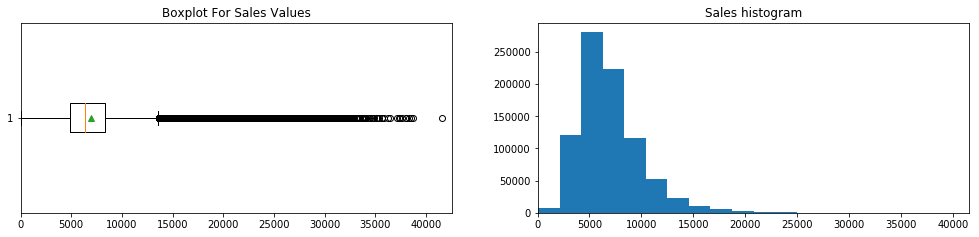

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}




In [22]:
print ("{0:.2f}% of the time having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time  having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

3.21% of the time having big sales day (considered outliers).
0.00% of the time  having no sales at all.


In [23]:
df_train.Customers.describe()    

count    844338.000000
mean        762.777429
std         401.194973
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.7774291812046, 'Median': 676.0}

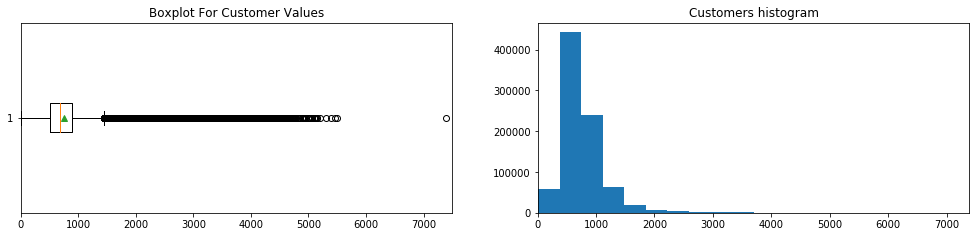

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

In [25]:
print ("{0:.2f}% of the time having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time having no customers at all.".format(df_train[df_train.Customers==0].count()[0]/df_train.shape[0]*100))

4.37% of the time having customers more than usual (considered outliers).
0.00% of the time having no customers at all.


In [26]:
df_train[df_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2016-01-22,27190,7388,1,1,0,0


In [27]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]

0.8235520263213598

In [19]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [28]:
df_store[pd.isnull(df_store.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

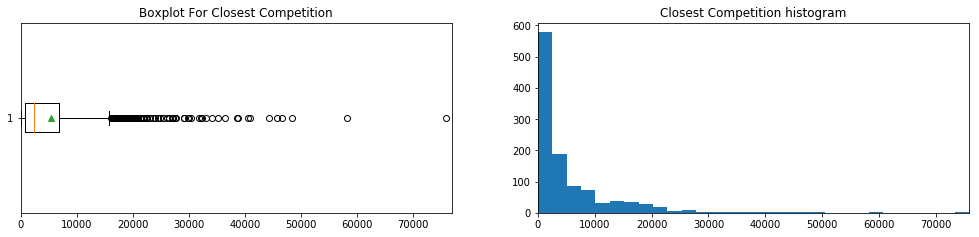

In [29]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(df_store.CompetitionDistance),"Median":np.nanmedian(df_store.CompetitionDistance),"Standard Dev":np.nanstd(df_store.CompetitionDistance)}#That's what i thought, very different values, let's see why 

In [22]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [23]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [24]:
#df_store[pd.isnull(df_store.Promo2SinceWeek)]
#df_store[pd.isnull(df_store.Promo2SinceWeek)& (df_store.Promo2==0)]

In [30]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [31]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek              100.000000
Promo2SinceYear              100.000000
PromoInterval                100.000000
dtype: float64

In [32]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_train_store.head() 
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1]))) 


The Train_Store dataset has 844338 Rows and 18 Variables


In [34]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [35]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2018-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2018-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2018-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2018-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2018-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


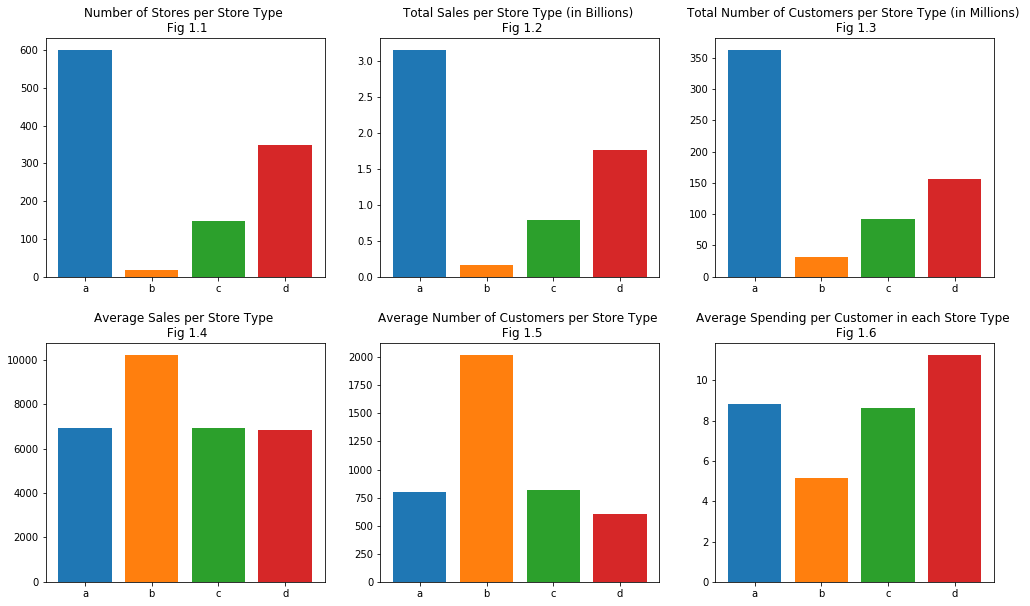

In [36]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

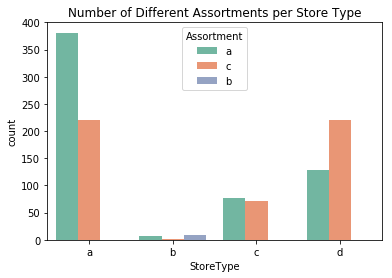

In [37]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=df_store,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
df_store.groupby(by=["StoreType","Assortment"]).Assortment.count()



In [38]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

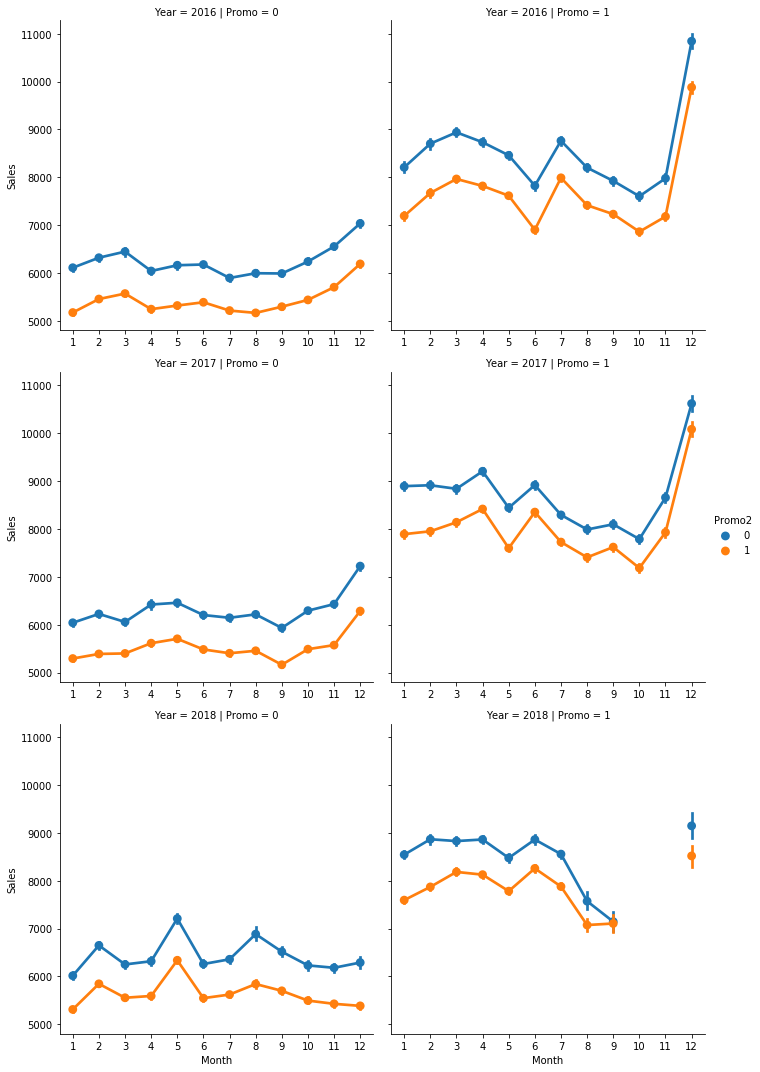

In [39]:

sns.factorplot(data = df_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)


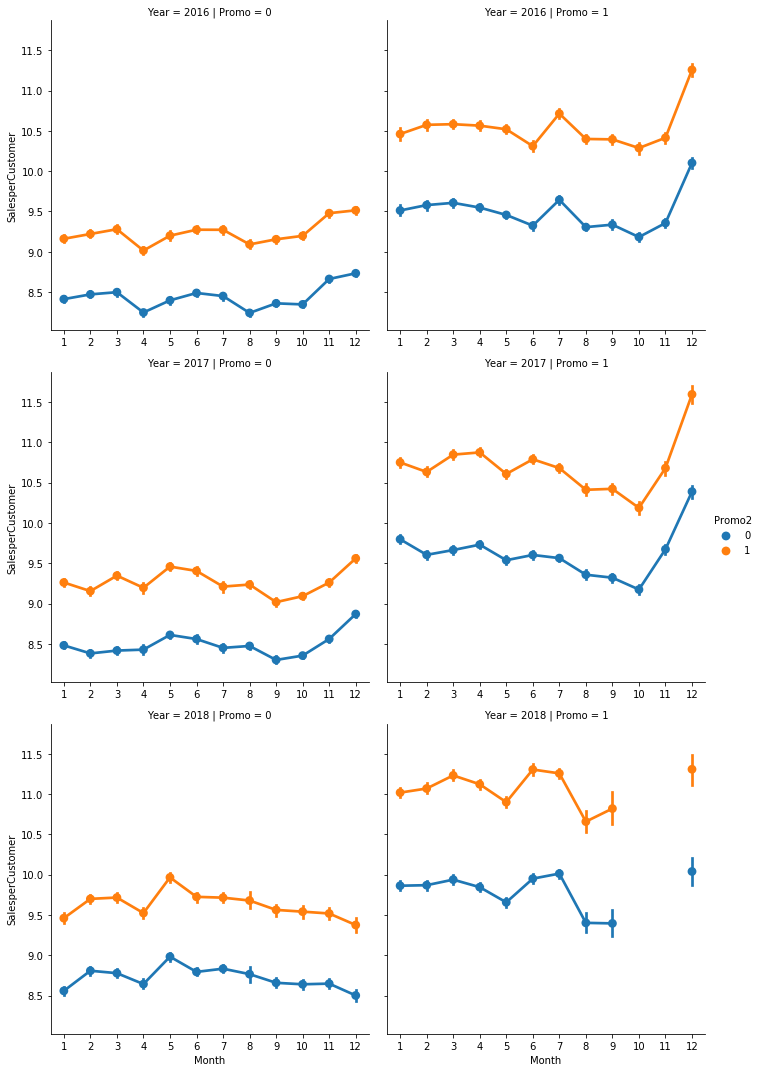

In [40]:
sns.factorplot(data = df_train_store, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


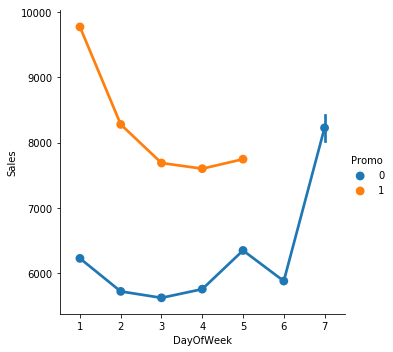

In [35]:
sns.factorplot(data = df_train_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [42]:
#33 Stores are opened on Sundays
print ("Number of Stores opened on Sundays:{}" .format(df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


In [43]:
df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 5)

In [44]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,CompetitionDist_Cat
0,1,5,2018-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2018,"(-55.84, 15188.0]"
1,2,5,2018-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2018,"(-55.84, 15188.0]"
2,3,5,2018-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2018,"(-55.84, 15188.0]"
3,4,5,2018-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,9.342457,7,2018,"(-55.84, 15188.0]"
4,5,5,2018-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,8.626118,7,2018,"(15188.0, 30356.0]"


In [45]:
df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     6961.648918
 (15188.0, 30356.0]    7041.606049
 (30356.0, 45524.0]    6471.923849
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64, CompetitionDist_Cat
 (-55.84, 15188.0]     771.980164
 (15188.0, 30356.0]    691.574765
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)

In [46]:
del df_train_store["CompetitionDist_Cat"]

In [47]:
df_train_store['Day']=df_train_store.Date.dt.day

In [48]:
del df_train_store["Date"]

In [50]:
df_train_store['StoreType'].isnull().any(),df_train_store['Assortment'].isnull().any(),df_train_store['StateHoliday'].isnull().any()
#No Null values we can proceed with the transformation

(False, False, False)

In [51]:
df_train_store["StoreType"].value_counts(),df_train_store["Assortment"].value_counts(),df_train_store["StateHoliday"].value_counts()

(a    457042
 d    258768
 c    112968
 b     15560
 Name: StoreType, dtype: int64, a    444875
 c    391254
 b      8209
 Name: Assortment, dtype: int64, 0    843428
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64)

In [52]:
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [53]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes



In [54]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

In [48]:

#df_train_store[['StateHoliday', 'StoreType', 'Assortment']] = df_train_store[['StateHoliday', 'StoreType', 'Assortment']].apply(lambda x: x.cat.codes)

In [49]:
df_train_store.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                 category
SchoolHoliday                   int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
SalesperCustomer              float64
Month                           int64
Year                            int64
Day                             int64
StateHoliday_cat              float64
Assortment_cat                float64
StoreType_cat                 float64
PromoInterval_cat             float64
dtype: object

In [59]:
df_correlation=df_train_store[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat']]

In [60]:
df_correlation=df_correlation.drop('Open', axis = 1)

In [61]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat'],
      dtype='object')

In [62]:
df_train_store['CompetitionOpenSince'] = np.where((df_train_store['CompetitionOpenSinceMonth']==0) & (df_train_store['CompetitionOpenSinceYear']==0) , 0,(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)) )

In [63]:
#now that CompetitionOpenSince is created 
#we can get rid of `CompetitionOpenSinceYear` and `CompeitionOpenSinceMonth`
del df_train_store['CompetitionOpenSinceYear']
del df_train_store['CompetitionOpenSinceMonth']


In [64]:
df_train_store["is_holiday_state"] = df_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [65]:
del df_train_store['StateHoliday_cat']

In [66]:
df_train_store=pd.get_dummies(df_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

In [67]:
del df_train_store['Assortment_cat']
del df_train_store['StoreType_cat']


In [68]:
del df_train_store['PromoInterval_cat']

In [69]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'SalesperCustomer', 'Month',
       'Year', 'Day', 'CompetitionOpenSince', 'is_holiday_state',
       'is_Assortment_a', 'is_Assortment_b', 'is_Assortment_c',
       'is_StoreType_a', 'is_StoreType_b', 'is_StoreType_c', 'is_StoreType_d',
       'is_PromoInteval_0', 'is_PromoInteval_Feb,May,Aug,Nov',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [70]:
df_test = pd.read_csv("test.csv",sep=',', parse_dates=['Date'],
                       low_memory = False)
print ("The Test dataset has {} Rows and {} Variables".format(str(df_test.shape[0]),str(df_test.shape[1])))

The Test dataset has 41088 Rows and 8 Variables


In [71]:
df_test.fillna(1, inplace = True) #11rows with Nans decided to leave them open since its one store 622 which is 
#usually open
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1]))) 
df_test_store['Month']=df_test_store.Date.dt.month
df_test_store['Year']=df_test_store.Date.dt.year
df_test_store['Day']=df_test_store.Date.dt.day

df_test_store['StateHoliday'] = df_test_store['StateHoliday'].astype('category')
df_test_store['Assortment'] = df_test_store['Assortment'].astype('category')
df_test_store['StoreType'] = df_test_store['StoreType'].astype('category')
df_test_store['PromoInterval']= df_test_store['PromoInterval'].astype('category')
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday'].cat.codes
df_test_store['Assortment_cat'] = df_test_store['Assortment'].cat.codes
df_test_store['StoreType_cat'] = df_test_store['StoreType'].cat.codes
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval'].cat.codes
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday_cat'].astype('float')
df_test_store['Assortment_cat'] = df_test_store['Assortment_cat'].astype('float')
df_test_store['StoreType_cat'] = df_test_store['StoreType_cat'].astype('float')
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval_cat'].astype('float')
df_test_store['CompetitionOpenSince'] = np.where((df_test_store['CompetitionOpenSinceMonth']==0) & (df_test_store['CompetitionOpenSinceYear']==0) , 0,(df_test_store.Month - df_test_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_test_store.Year - df_test_store.CompetitionOpenSinceYear)) )



df_test_store["is_holiday_state"] = df_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})




df_test_store=pd.get_dummies(df_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])


The Test_Store dataset has 41088 Rows and 17 Variables


In [72]:
del df_test_store['Date']
del df_test_store['CompetitionOpenSinceYear']
del df_test_store['CompetitionOpenSinceMonth']


In [73]:
del df_test_store['StateHoliday_cat']

In [74]:
del df_test_store['Assortment_cat']
del df_test_store['StoreType_cat']
del df_test_store['PromoInterval_cat']

In [75]:
del df_test_store['StateHoliday']

In [76]:
del df_train_store['StateHoliday']

In [77]:
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [78]:
features = df_train_store.drop(['Customers', 'Sales', 'SalesperCustomer'], axis = 1) 
#a rule of thumb is to transform my target value to log if i see the values are very dispersed which is the case
#and then of course revert them with np.exp to their real values
targets=np.log(df_train_store.Sales)


In [81]:
X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, targets, test_size=0.20, random_state=15)
print ("Training and testing split was successful.")


Training and testing split was successful.


In [82]:
rfr = RandomForestRegressor(n_estimators=10, 
                             criterion='mse', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4,
                             random_state=31, 
                             verbose=0, 
                             warm_start=False)
rfr.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [145]:

'''
params = {'max_depth':(4,6,8,10,12,14,16,20),
         'n_estimators':(4,8,16,24,48,72,96,128),
         'min_samples_split':(2,4,6,8,10)}
#scoring_fnc = metrics.make_scorer(rmspe)
#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV 
# is a better option then GridSearchCV
grid = model_selection.RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=10) 
#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.(takes time to run but is worth doing it)
grid.fit(X_train, y_train)
'''
#I AM NOT GOING TO RUN THIS CHUNK TO BE ABLE TO COMMIT AND RUN MY KERNEL ON KAGGLE

"\nparams = {'max_depth':(4,6,8,10,12,14,16,20),\n         'n_estimators':(4,8,16,24,48,72,96,128),\n         'min_samples_split':(2,4,6,8,10)}\n#scoring_fnc = metrics.make_scorer(rmspe)\n#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV \n# is a better option then GridSearchCV\ngrid = model_selection.RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=10) \n#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.(takes time to run but is worth doing it)\ngrid.fit(X_train, y_train)\n"

In [146]:
#This is the best combination i got from what i propose to try out with a (mse) score of 0.855 which is quite good
#grid.best_params_,grid.best_score_
#MY BEST PARAMS ARE :n_estimators=128,max_depth=20,min_samples_split=10

In [147]:
#with the optimal parameters i got let's see how it behaves with the validation set
rfr_val=RandomForestRegressor(n_estimators=128, 
                             criterion='rmse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, #setting n_jobs to 4 makes sure you're using the full potential of the machine you're running the training on
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)
model_RF_test=rfr_val.fit(X_train,y_train)

In [148]:
yhat=model_RF_test.predict(X_train_test)

(array([3.3000e+01, 3.1500e+02, 1.4240e+03, 7.9370e+03, 3.5344e+04,
        7.4586e+04, 3.9543e+04, 7.9330e+03, 1.6740e+03, 7.9000e+01]),
 array([ 6.62418282,  7.01069701,  7.39721121,  7.7837254 ,  8.17023959,
         8.55675378,  8.94326797,  9.32978217,  9.71629636, 10.10281055,
        10.48932474]),
 <a list of 10 Patch objects>)

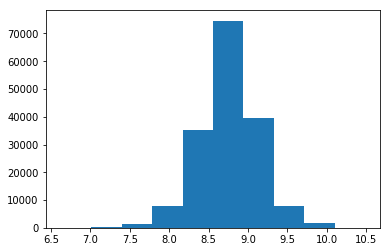

In [149]:
plt.hist(yhat)

In [150]:
error=rmspe(y_train_test,yhat)
error

0.1629166664720833

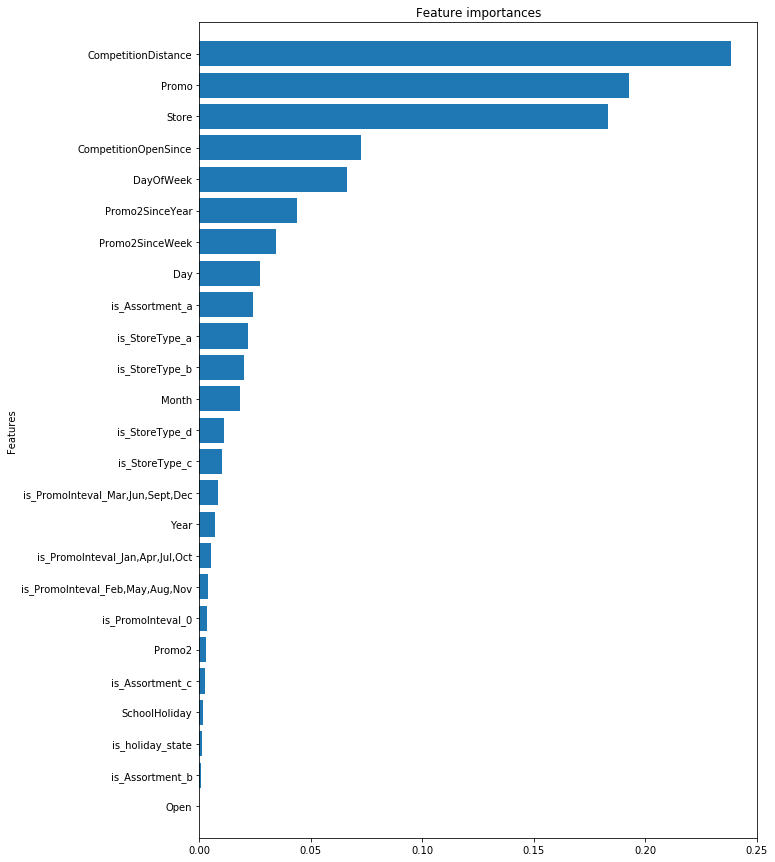

In [151]:
importances = rfr_val.feature_importances_
std = np.std([rfr_val.feature_importances_ for tree in rfr_val.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()



In [152]:
df_test_store1=df_test_store.drop(['Id'],axis=1)
kaggle_yhat= model_RF_test.predict(df_test_store1)
kaggle_preds= pd.DataFrame({'Id': df_test_store['Id'], 
                          'Sales': np.exp(kaggle_yhat)})
kaggle_preds.to_csv("submission.csv", index = False)
